In [1]:
import sklearn as skl
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as sklinear
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from OLS import OLS
from Ridge import Ridge
from LASSO import LASSO
from functions import Polynomial_Features

### Comparing own code with sklearn

OLS mean:  -2.2300615016681935e-11
OLS  var:  6.575702584228524e-21
OLS  max:  1.5454975529121912e-09


Ridge mean:  -1.064557831115214e-12
Ridge  var:  5.223175549104386e-22
Ridge  max:  6.362395055248271e-10


Text(0.5, 0, 'MSE difference')

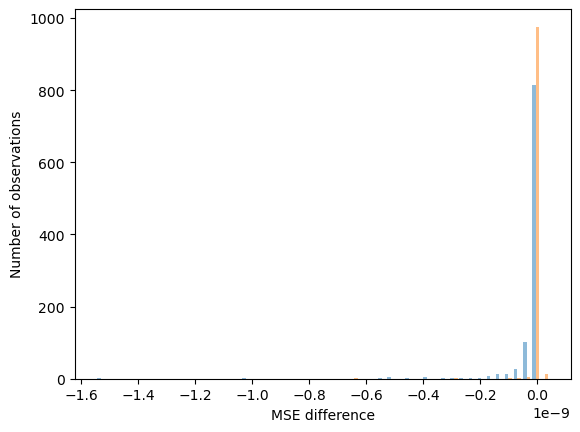

In [4]:
np.random.seed(2025)

num_runs = 1000 # number of runs
num_points = 100
deg_max = 15

ridge_param = 0.01

#plotting
n_bins = 50

#random degrees
degs = np.random.randint(1, deg_max, size = num_runs)

# random x values
x = np.random.uniform(-1,1, num_points)
X = Polynomial_Features(x,deg_max)

mse_diff_ols = np.zeros(num_runs)
mse_diff_ridge = np.zeros(num_runs)

for i, d in enumerate(degs):
    Xd = X[:,:d]
    # random polynomial
    coeffs = np.random.uniform(-50,50, d)
    y = Xd @ coeffs
    
    Xd_tr, Xd_test, y_tr, y_test = skl.model_selection.train_test_split(X, y, test_size=0.2)
    # Sklearn models
    scaler = skl.preprocessing.StandardScaler()
    scaler.fit(Xd_tr)
    
    Xd_tr_scaled = scaler.transform(Xd_tr)
    Xd_test_scaled = scaler.transform(Xd_test)
    
    y_offset = y_tr.mean()
    y_tr_centered = y_tr - y_offset
    
    # OLS
    
    sklmodel = LinearRegression(fit_intercept=False)
    sklmodel.fit(Xd_tr_scaled, y_tr_centered)
    
    skpredict = sklmodel.predict(Xd_test_scaled) + y_offset
    
    ownmodel = OLS("analytic")
    ownparams, _, _ = ownmodel.fit(Xd_tr_scaled, y_tr_centered)
    
    ownpredict = Xd_test_scaled @ ownparams + y_offset
    
    skmse_ols = skl.metrics.mean_squared_error(y_test, skpredict)
    ownmse_ols = skl.metrics.mean_squared_error(y_test, ownpredict)
    
    mse_diff_ols[i] = skmse_ols-ownmse_ols
    
    # Ridge
    
    sklmodel = sklinear.Ridge(fit_intercept=False, alpha=ridge_param)
    sklmodel.fit(Xd_tr_scaled, y_tr_centered)
    
    skpredict = sklmodel.predict(Xd_test_scaled) + y_offset
    
    ownmodel = Ridge("analytic", llambda = ridge_param)
    ownparams, _, _ = ownmodel.fit(Xd_tr_scaled, y_tr_centered)
    
    ownpredict = Xd_test_scaled @ ownparams + y_offset
    
    skmse_ridge = skl.metrics.mean_squared_error(y_test, skpredict)
    ownmse_ridge = skl.metrics.mean_squared_error(y_test, ownpredict)
    
    mse_diff_ridge[i] = skmse_ridge-ownmse_ridge

mse_diffs=[mse_diff_ols, mse_diff_ridge]
print("OLS mean: ", np.mean(mse_diff_ols))
print("OLS  var: ", np.var(mse_diff_ols))
print("OLS  max: ", np.max(np.abs(mse_diff_ols)))
print("\n")
print("Ridge mean: ",np.mean(mse_diff_ridge))
print("Ridge  var: ", np.var(mse_diff_ridge))
print("Ridge  max: ", np.max(np.abs(mse_diff_ridge)))
#plt.hist(mse_diff_ols, n_bins, alpha=0.5, label="OLS")
plt.hist(mse_diffs, n_bins, alpha=0.5, label = ["OLS", "Ridge"])
#plt.hist(mse_diff_ridge, n_bins, alpha=0.5)
plt.ylabel("Number of observations")
plt.xlabel("MSE difference")
    